# Healthcare Medical Appt Analysis

 By: Hamzah Sami

An issue in healthcare is patients not showing up to their medical appts. Aside from the danger of not checking their health, the issue of patients no-showing is an expensive one. According to Lumahealth.io, the healthcare industry loses 150 billion dollars a year from medical no-shows. Additionally, 18.8% of patients no-show at appts and this causes clinics to lose over 150,000 dollars a year per provider.

The following dataset consists of 110,527 medical appts collected from the Joni Hoppen and Aquarela Advanced Analytics Aquarela. The goals of analyzing this dataset are: 

- Does the neighborhood affect why  people don't make it to their appts?
- Does scholarship status affect why there are so many no-shows?
- does the difference between scheduling an appt and going to the appt affect the chance of a no-show?
- Do SMS messages actually help?

source: https://www.kaggle.com/code/sohailadiab/medical-appointment-no-shows-analysis

Content
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

14 variables

01 - PatientId
Identification of a patient

02 - AppointmentID
Identification of each appointment

03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.

05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.

06 - Age
How old is the patient.

07 - Neighbourhood
Where the appointment takes place.

08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hypertension
True or False

10 - Diabetes
True or False

Alcoholism
True or False

Handcap
True or False

SMS_received
1 or more messages sent to the patient.

No-show
True or False.

Note that there are repeated entries for patients. 

In [236]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime

In [237]:
#read data
df = pd.read_csv("/Users/.../medical_wait_times.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [238]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  110527
Number of columns:  14


# Data Cleaning

- check for nulls
- drop patient id
- convert ScheduledDay, AppointmentDay variables into datetime variables
- convert No-show to a binary variable (1 = YES, 0 = NO)
- create a new variable for week_number to track no shows and neighborhoods.

In [239]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [240]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- No nulls noted

In [241]:
#Spell hypertension correctly
df.rename(columns = {'Hipertension': 'Hypertension', 'No-show':'No_shows'}, inplace = True)

In [242]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_shows'],
      dtype='object')

In [243]:
#check for outliers in age
df['Age'].min()
df[df['Age'] == 0].shape[0]

3539

There is one row for which age is -1 and 3539 rows for which age = 0. Obviously, these are invalid to use in our analysis so we need to remove them.

In [244]:
#make sure age is greater than 0
original_rows = 110527
df = df[df['Age'] > 0]
df
print("excluded rows: ",original_rows - df.shape[0])

excluded rows:  3540


Great, we have excluded all the invalid rows for age!

All of the other variables are clean so we can dive into the analysis.

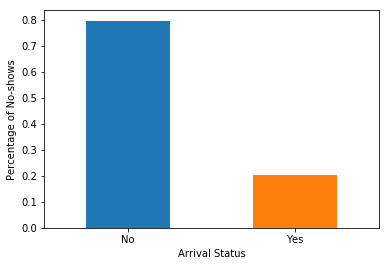

In [245]:
#plot percentage of No shows
df['No_shows'].value_counts(normalize = True).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel("Arrival Status")
plt.ylabel("Percentage of No-shows")
plt.show()

In [246]:
no_shows = round(df['No_shows'].value_counts(normalize = True)[1] * 100, 2)
print("Percentage of No_shows: " + str(no_shows) + '%')

Percentage of No_shows: 20.26%


- Close to 20% of all appts made had no-shows. What are ways we can trim this number down?

# Research Question 1

- Does the neighborhood affect why  people don't make it to their appts?
- There are 81 unique neighborhoods in the given dataset. According to the data, almost 7% of scheduled appts cite their neighborhood as Jardim Camburi and almost 5% com from Maria Ortiz. 

In [247]:
#count how many appointments come from certain neighborhoods
df['Neighbourhood'].value_counts(normalize = True).sort_values(ascending = False)

JARDIM CAMBURI                 0.070906
MARIA ORTIZ                    0.051997
RESISTÊNCIA                    0.039584
JARDIM DA PENHA                0.035995
ITARARÉ                        0.031892
CENTRO                         0.030677
SANTA MARTHA                   0.028424
TABUAZEIRO                     0.028218
JESUS DE NAZARETH              0.025414
BONFIM                         0.025237
SANTO ANTÔNIO                  0.024984
CARATOÍRA                      0.023265
SANTO ANDRÉ                    0.022975
JABOUR                         0.022395
SÃO PEDRO                      0.021928
ILHA DO PRÍNCIPE               0.020769
ANDORINHAS                     0.020517
DA PENHA                       0.020143
NOVA PALESTINA                 0.020068
ROMÃO                          0.019872
GURIGICA                       0.017806
SÃO JOSÉ                       0.017460
MARUÍPE                        0.017432
BELA VISTA                     0.017142
ILHA DE SANTA MARIA            0.017039


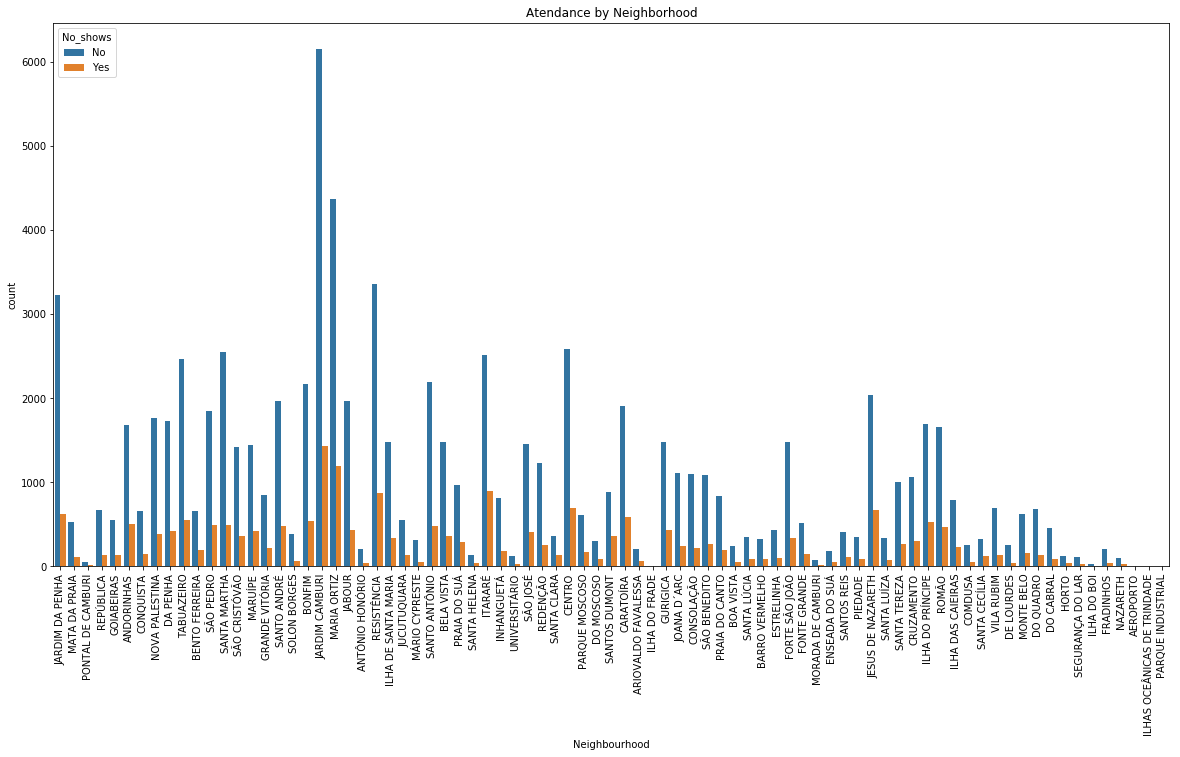

In [248]:
#plot no-shows by neighborhood
plt.figure(figsize=(20,10))
sns.countplot(x=df['Neighbourhood'], hue=df['No_shows']);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90);

In [249]:
#Jardin Camburi and Maria Ortiz are most frequent. Make separate df
jardim_camburi = df[df['Neighbourhood'] == 'JARDIM CAMBURI']
maria_ortiz = df[df['Neighbourhood'] == 'MARIA ORTIZ']

In [250]:
jardim_camburi.groupby(by = 'No_shows')['No_shows'].count()/len(jardim_camburi)

No_shows
No     0.811231
Yes    0.188769
Name: No_shows, dtype: float64

In [251]:
maria_ortiz.groupby(by = 'No_shows')['No_shows'].count()/len(maria_ortiz)

No_shows
No     0.785368
Yes    0.214632
Name: No_shows, dtype: float64

- The two neighbourhood with the most no-shows are Jardin Camburi and Maria Ortiz. About 19% of all medical appts from Jardim Camburi were no-shows and over 21% of all no-shows were from maria ortiz. The vast majority of appointments are from the two neighbourhoods listed but when looking at the bar graph above, every neighbourhood seems to have more no-shows than arrival. The neighbourhood may pay an issue, but it is clear that there are more factors to consider. 

## Research Question 2

- Does scholarship status affect why there are so many no-shows?

- According to the given link provided, to be on scholarship in this instance means to be a member of a social welfare program that provides financial aid to poor families. 

- In fact, this program was considered the number one reason for why poverty in Brazil fell and improved the job market and minimum wage.

- As of 2021, this program has ended and has been replaced by a new government program. 

In [252]:
df['Scholarship'].value_counts(normalize = True)

0    0.898969
1    0.101031
Name: Scholarship, dtype: float64

- About 90% of all medical appts classify themselves as not being on scholarship. 

In [253]:
scholar = df[df['Scholarship'] == 1]
not_scholar = df[df['Scholarship'] == 0]

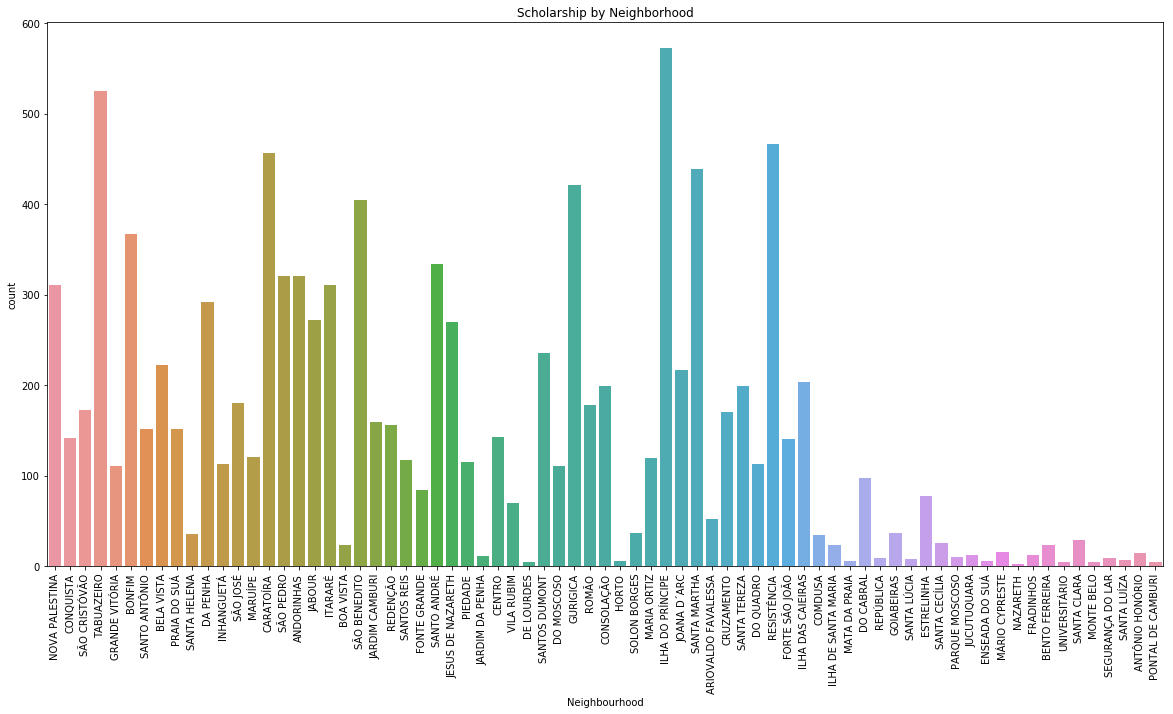

In [254]:
#what neighborhoods are on scholarship
plt.figure(figsize=(20,10))
sns.countplot(x=scholar['Neighbourhood'])
plt.title('Scholarship by Neighborhood')
plt.xticks(rotation=90);

In [255]:
#count number of scholarships by no show status and neighborhood 
scholar.groupby(by = ['Neighbourhood','No_shows'])['Scholarship'].count().sort_values(ascending = False)

Neighbourhood        No_shows
ILHA DO PRÍNCIPE     No          432
TABUAZEIRO           No          423
RESISTÊNCIA          No          372
CARATOÍRA            No          352
SANTA MARTHA         No          343
SÃO BENEDITO         No          327
GURIGICA             No          310
BONFIM               No          278
SÃO PEDRO            No          255
SANTO ANDRÉ          No          255
NOVA PALESTINA       No          243
ANDORINHAS           No          230
ITARARÉ              No          222
JESUS DE NAZARETH    No          208
DA PENHA             No          207
JABOUR               No          199
BELA VISTA           No          175
JOANA D´ARC          No          171
SANTOS DUMONT        No          171
ILHA DAS CAIEIRAS    No          160
CONSOLAÇÃO           No          158
SANTA TEREZA         No          145
ILHA DO PRÍNCIPE     Yes         140
SÃO CRISTÓVÃO        No          137
SÃO JOSÉ             No          133
ROMÃO                No          131
REDENÇÃO

- The neighborhoods with the most people on scholarship that are no-shows are ILHA DO PRÍNCIPE (140) and GURIGICA (111). It is also of note that the neighborhoods with the two most no_shows (Jardim Camburi and Maria Ortiz are well below other neighborhoods).

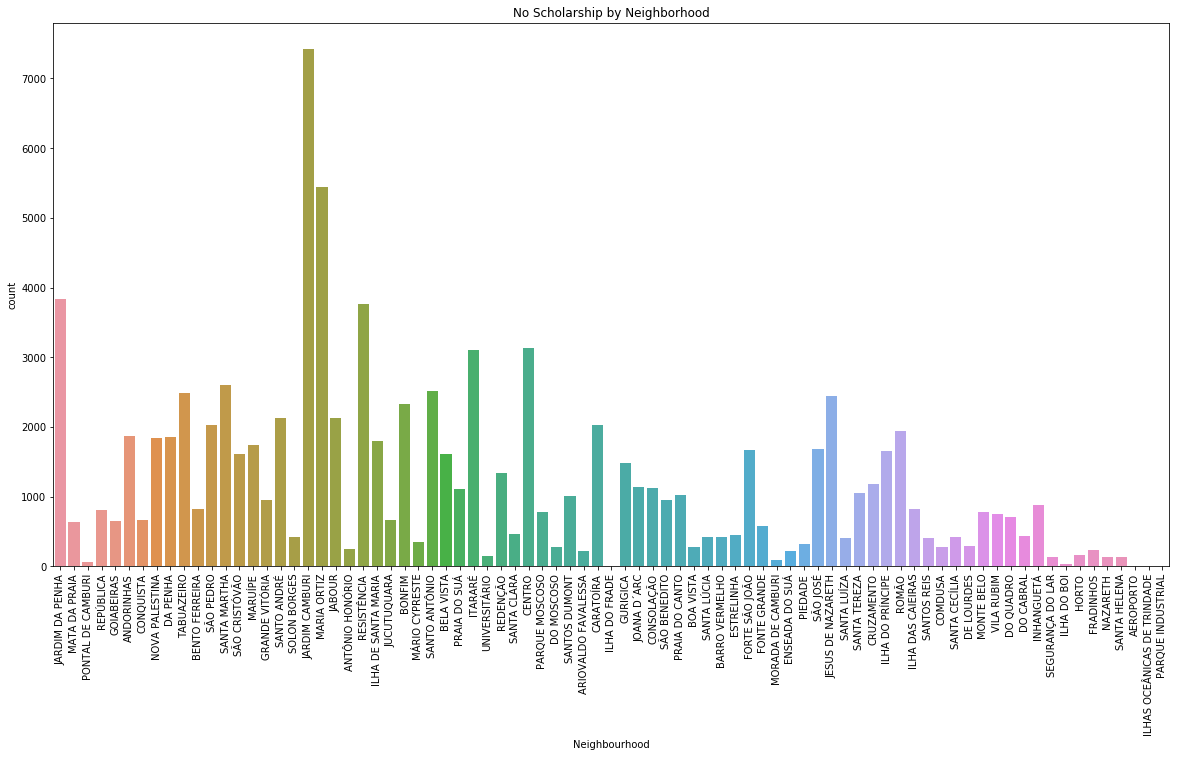

In [256]:
#what neighborhoods are on scholarship
plt.figure(figsize=(20,10))
sns.countplot(x=not_scholar['Neighbourhood'])
plt.title('No Scholarship by Neighborhood')
plt.xticks(rotation=90);

In [257]:
not_scholar.groupby(by = ['Neighbourhood','No_shows'])['Scholarship'].count().sort_values(ascending = False)

Neighbourhood                No_shows
JARDIM CAMBURI               No          6038
MARIA ORTIZ                  No          4285
JARDIM DA PENHA              No          3214
RESISTÊNCIA                  No          2988
CENTRO                       No          2479
ITARARÉ                      No          2292
SANTA MARTHA                 No          2209
SANTO ANTÔNIO                No          2096
TABUAZEIRO                   No          2044
BONFIM                       No          1885
JESUS DE NAZARETH            No          1835
JABOUR                       No          1765
SANTO ANDRÉ                  No          1717
SÃO PEDRO                    No          1594
CARATOÍRA                    No          1551
ROMÃO                        No          1529
DA PENHA                     No          1526
NOVA PALESTINA               No          1520
ILHA DE SANTA MARIA          No          1464
ANDORINHAS                   No          1456
JARDIM CAMBURI               Yes         1

- On that note, Jardim Camburi (1389) and Maria Ortiz (1159) have the no-shows for people that are not on scholarship. 

## Research Question 3

- Do SMS messages actually help?

In [258]:
df['SMS_received'].value_counts(normalize = True)

0    0.676736
1    0.323264
Name: SMS_received, dtype: float64

- About 68% of the data says that they do not receive SMS reminders about their appointments

In [259]:
df.groupby(by = ['SMS_received','No_shows'])['No_shows'].count().unstack()

No_shows,No,Yes
SMS_received,,
0,60290,12112
1,25017,9568


- When we compare the number of no-shows between who receives SMS reminders and who doesn't, we cannot conclude if this is a significant reason for why people no-show their appointments. After all, it appears that whether people recieve the SMS or not, the vast majority do come to their appointments. 

## Research Question 4

- does the difference between scheduling an appt and going to the appt affect the chance of a no-show?

- We will remove the times used for scheduling the appointment. Since all appointment times are set to 0, we'll omit the times in the scheduling dates and assess the days in between. 

In [260]:
#Since both dates are objects, convert them to datetime[ns] objects first

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 

#Now that we have datetime[ns] objects, we want to remove the ns unit (time). We use the strftime function and apply it to both objects.
#Note that using this function changes the dates back into objects.
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [261]:
#We need to change the objects back into dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_shows
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [262]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No_shows                  object
dtype: object

In [263]:
#define new variable time_diff that takes the difference. 
df['time_diff'] = df['AppointmentDay'] - df['ScheduledDay']
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_shows,time_diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [264]:
df.dtypes

PatientId                 float64
AppointmentID               int64
Gender                     object
ScheduledDay       datetime64[ns]
AppointmentDay     datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No_shows                   object
time_diff         timedelta64[ns]
dtype: object

In [265]:
#There are negative entries for time_diff. Scheduled appt was after appointment day. That makes no sense
#df_new = df[df['time_diff'] >= pd.Timedelta(0)]
#print("difference in rows: ",df.shape[0]-df_new[0])

df = df[df['time_diff'] >= pd.Timedelta(0)]

In [266]:
#make two separate dfs according to the time difference between appointments
zero_days = df[df['time_diff'] == '0 days']
nonzero_days = df[df['time_diff'] != '0 days']

print(len(zero_days))
print(len(nonzero_days))

37154
69828


In [267]:
#find same day no shows
noshow_sameday = zero_days.groupby(by = ['time_diff','No_shows'])['No_shows'].count()
noshow_sameday

time_diff  No_shows
0 days     No          35413
           Yes          1741
Name: No_shows, dtype: int64

In [268]:
noshow_sameday/len(zero_days)

time_diff  No_shows
0 days     No          0.953141
           Yes         0.046859
Name: No_shows, dtype: float64

- As it turns out, 95% of appointments occur when they are scheduled the same day as the appointment. Interesting. I wonder if this is because of medical emergencies prompting people to schedule appointments.

In [269]:
#define separate dfs for no show status. We do this because number of days varies
yes_shows = nonzero_days[nonzero_days['No_shows'] == 'Yes']
no_shows = nonzero_days[nonzero_days['No_shows'] == 'No']

#find no shows and determine most frequent time difference 
yesshow_diffday = yes_shows.groupby(by = ['time_diff','No_shows'])['No_shows'].count().sort_values(ascending = False)
yesshow_diffday 

time_diff  No_shows
2 days     Yes         1584
7 days     Yes         1271
4 days     Yes         1209
1 days     Yes         1075
6 days     Yes          975
14 days    Yes          880
5 days     Yes          846
8 days     Yes          650
3 days     Yes          623
21 days    Yes          550
13 days    Yes          515
15 days    Yes          485
28 days    Yes          483
10 days    Yes          432
9 days     Yes          429
22 days    Yes          394
20 days    Yes          391
19 days    Yes          357
17 days    Yes          344
16 days    Yes          343
29 days    Yes          342
12 days    Yes          341
35 days    Yes          341
11 days    Yes          307
27 days    Yes          306
18 days    Yes          304
23 days    Yes          267
34 days    Yes          265
26 days    Yes          258
25 days    Yes          249
                       ... 
91 days    Yes           12
71 days    Yes           11
79 days    Yes            9
85 days    Yes            8


In [270]:
#convert above results to percent
print(yesshow_diffday/len(nonzero_days))

time_diff  No_shows
2 days     Yes         0.022684
7 days     Yes         0.018202
4 days     Yes         0.017314
1 days     Yes         0.015395
6 days     Yes         0.013963
14 days    Yes         0.012602
5 days     Yes         0.012115
8 days     Yes         0.009309
3 days     Yes         0.008922
21 days    Yes         0.007876
13 days    Yes         0.007375
15 days    Yes         0.006946
28 days    Yes         0.006917
10 days    Yes         0.006187
9 days     Yes         0.006144
22 days    Yes         0.005642
20 days    Yes         0.005599
19 days    Yes         0.005113
17 days    Yes         0.004926
16 days    Yes         0.004912
29 days    Yes         0.004898
12 days    Yes         0.004883
35 days    Yes         0.004883
11 days    Yes         0.004397
27 days    Yes         0.004382
18 days    Yes         0.004354
23 days    Yes         0.003824
34 days    Yes         0.003795
26 days    Yes         0.003695
25 days    Yes         0.003566
                    

- Most people no-show their appointments after at least two days. Since the percentages of the higher differences are low, this could be because people cancel their appointments after a certain amount of time.

In [271]:
#find non no-shows and determine most frequent time difference 
noshow_diffday = no_shows.groupby(by = ['time_diff','No_shows'])['No_shows'].count().sort_values(ascending = False)
noshow_diffday 

time_diff  No_shows
2 days     No          5052
4 days     No          4003
1 days     No          3953
7 days     No          3514
6 days     No          2975
5 days     No          2350
3 days     No          2016
14 days    No          1933
8 days     No          1598
21 days    No          1239
28 days    No          1135
9 days     No          1134
13 days    No          1107
15 days    No           956
10 days    No           928
16 days    No           768
20 days    No           760
22 days    No           743
12 days    No           742
17 days    No           733
29 days    No           698
18 days    No           698
27 days    No           674
19 days    No           655
11 days    No           648
35 days    No           569
23 days    No           523
34 days    No           507
30 days    No           475
26 days    No           454
                       ... 
108 days   No             5
142 days   No             5
112 days   No             5
81 days    No             5


In [272]:
#convert above results to percent
print(noshow_diffday/len(nonzero_days))

time_diff  No_shows
2 days     No          0.072349
4 days     No          0.057327
1 days     No          0.056611
7 days     No          0.050324
6 days     No          0.042605
5 days     No          0.033654
3 days     No          0.028871
14 days    No          0.027682
8 days     No          0.022885
21 days    No          0.017744
28 days    No          0.016254
9 days     No          0.016240
13 days    No          0.015853
15 days    No          0.013691
10 days    No          0.013290
16 days    No          0.010998
20 days    No          0.010884
22 days    No          0.010640
12 days    No          0.010626
17 days    No          0.010497
29 days    No          0.009996
18 days    No          0.009996
27 days    No          0.009652
19 days    No          0.009380
11 days    No          0.009280
35 days    No          0.008149
23 days    No          0.007490
34 days    No          0.007261
30 days    No          0.006802
26 days    No          0.006502
                    

- Appointments do not have no-shows if they are set within a week of being scheduled. With that said, the best case scenario is to plan an appointment the same day as it is scheduled.

Conclusion: The goal of this data analysis was to determine what is the underlying cause for why people no-show their medical appointments. From examining neighborhoods, scholarship status, and even whether or not they recieved SMS messages, a potential hypothesis for what is causing people to no-show is the amount of time between scheduling the appointment and the date of the actual appointment.

Approximately 95% of patients didnt't no-show their appointments when they scheduled an appointment the same day as the appointment. There are a number of underlying reasons to consider for why this is so, but this insight can hopefully provide further answers and help clinics and hospitals cut down their expenses by a significant amount.

For further analysis, I would want to dive deeper into whether medical conditions contribute to people no-showing their appointments. I do wonder if ailments such as Diabetes or hypertension are taken or not taken as seriously as they should be. Even after analyzing this dataset, I still find myself with more questions to ask than answers found. 